# Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Help Functions

# Load Data

## Dados Exportação

In [2]:
df_exp_espumante = pd.read_csv('datasets/tech-challenge/content/ExpEspumantes.csv', delimiter=";")
df_exp_suco      = pd.read_csv('datasets/tech-challenge/content/ExpSuco.csv', delimiter=";")
df_exp_uva       = pd.read_csv('datasets/tech-challenge/content/ExpUva.csv', delimiter=";")
df_exp_vinho     = pd.read_csv('datasets/tech-challenge/content/ExpVinho.csv', delimiter=";")

## Dados Importação

In [3]:
df_imp_espumante = pd.read_csv('datasets/tech-challenge/content/ImpEspumantes.csv', delimiter=";")
df_imp_frescas   = pd.read_csv('datasets/tech-challenge/content/ImpFrescas.csv', delimiter=";")
df_imp_passas    = pd.read_csv('datasets/tech-challenge/content/ImpPassas.csv', delimiter=";")
df_imp_suco      = pd.read_csv('datasets/tech-challenge/content/ImpSuco.csv', delimiter=";")
df_imp_vinho     = pd.read_csv('datasets/tech-challenge/content/ImpVinhos.csv', delimiter=";")

## Dados Processamento

In [4]:
df_processa_americanas = pd.read_csv('datasets/tech-challenge/content/ProcessaAmericanas.csv', sep=';')
df_processa_mesa       = pd.read_csv('datasets/tech-challenge/content/ProcessaMesa.csv', sep=';')
df_processa_sem_class  = pd.read_csv('datasets/tech-challenge/content/ProcessaSemclass.csv', sep=';')
df_processa_viniferas  = pd.read_csv('datasets/tech-challenge/content/ProcessaViniferas.csv', sep=';')

## Dados Comércio

In [5]:
df_comercio = pd.read_csv('datasets/tech-challenge/content/Comercio.csv', sep=';')

## Dados Produção

In [6]:
df_producao = pd.read_csv('datasets/tech-challenge/content/Producao.csv', sep=';')

# Análise Exploratória de Dados

# Tratamento dos Dados

## Tratamento Exportação

In [7]:
colunas = df_exp_vinho.columns[-30:]
colunas = colunas.insert(0, df_exp_vinho.columns[1])

In [9]:
df_exp_espumante = df_exp_espumante[colunas]
df_exp_suco      = df_exp_suco[colunas]
df_exp_uva       = df_exp_uva[colunas]
df_exp_vinho     = df_exp_vinho[colunas]

In [10]:
df_exp_espumante['Produto'] = 'Espumante'
df_exp_suco['Produto']      = 'Suco'
df_exp_uva['Produto']       = 'Uva'
df_exp_vinho['Produto']     = 'Vinho'

In [11]:
df_exp_geral = pd.concat([df_exp_espumante, df_exp_suco, df_exp_uva, df_exp_vinho], ignore_index=True)

In [12]:
new_columns_name = []
for col in df_exp_geral.columns:
    if str(col) == 'País':
        new_columns_name.append(col)
        
    if str(col).endswith(".1"):
        new_columns_name.append(str(col).replace(".1", " KG"))
        
    elif not str(col).endswith(".1") and not str(col) == "País":
        new_columns_name.append(str(col).replace(".1", " US$"))

In [13]:
df_exp_geral.columns = new_columns_name

## Tratamento Importação

In [14]:
colunas = df_imp_espumante.columns[-30:]
colunas = colunas.insert(0, df_imp_espumante.columns[1])

In [15]:
df_imp_espumante = df_imp_espumante[colunas]
df_imp_frescas   = df_imp_frescas[colunas]
df_imp_passas    = df_imp_passas[colunas]
df_imp_suco      = df_imp_suco[colunas]
df_imp_vinho     = df_imp_vinho[colunas]

In [16]:
df_imp_espumante['Produto'] = 'Espumante'
df_imp_frescas['Produto']   = 'Frescas'
df_imp_passas['Produto']    = 'Passas'
df_imp_suco['Produto']      = 'Suco'
df_imp_vinho['Produto']     = 'Vinho'

In [17]:
df_imp_geral = pd.concat([df_imp_espumante, df_imp_frescas, df_imp_passas, df_imp_suco, df_imp_vinho], ignore_index=True)

In [18]:
new_columns_name = []
for col in df_imp_geral.columns:
    if str(col) == 'País':
        new_columns_name.append(col)
        
    if str(col).endswith(".1"):
        new_columns_name.append(str(col).replace(".1", " KG"))
        
    elif not str(col).endswith(".1") and not str(col) == "País":
        new_columns_name.append(str(col).replace(".1", " US$"))

In [19]:
df_imp_geral.columns = new_columns_name

## Tratamento Processamento

In [20]:
df_processa_americanas.drop(index=35, inplace=True)
df_processa_americanas.drop(index=0, inplace=True)

In [21]:
df_processa_mesa.drop(index=0, inplace=True)
df_processa_mesa.drop(index=3, inplace=True)

In [22]:
df_processa_viniferas.drop(index=0, inplace=True)
df_processa_viniferas.drop(index=70, inplace=True)
df_processa_viniferas.drop(index=135, inplace=True)

In [23]:
df_processa = pd.concat([df_processa_americanas,df_processa_mesa,df_processa_viniferas,df_processa_sem_class])

In [24]:
df_processa_filtrada = df_processa[['control', 'cultivar','2007','2008','2009','2010','2011','2012','2013','2014','2015','2016','2017','2018','2019','2020','2021']]


In [25]:
df_periodos = df_processa.iloc[:,40:55]
df_tipos = df_processa.iloc[:, 1:3]

In [26]:
df_concat = pd.concat([df_tipos, df_periodos], axis=1)

## Tratamento Comércio

In [27]:
columns_name = df_processa.columns

In [28]:
df_comercio_com_titulo = df_comercio
df_comercio_com_titulo.columns = columns_name

In [29]:
df_comercio_com_titulo.drop(index=0, inplace=True)
df_comercio_com_titulo.drop(index=4, inplace=True)
df_comercio_com_titulo.drop(index=8, inplace=True)
df_comercio_com_titulo.drop(index=9, inplace=True)
df_comercio_com_titulo.drop(index=10, inplace=True)
df_comercio_com_titulo.drop(index=14, inplace=True)
df_comercio_com_titulo.drop(index=18, inplace=True)
df_comercio_com_titulo.drop(index=23, inplace=True)
df_comercio_com_titulo.drop(index=24, inplace=True)

In [30]:
filtro_colunas = ['control', 'cultivar','2007','2008','2009','2010','2011','2012','2013','2014','2015','2016','2017','2018','2019','2020','2021']

In [31]:
df_comercio_filtrada = df_comercio_com_titulo[filtro_colunas]

## Tratamento Produção

In [32]:
columns_name = df_processa.columns

In [33]:
df_producao_com_titulo = df_producao
df_producao_com_titulo.columns = columns_name

In [34]:
df_producao_com_titulo.drop(index=0, inplace=True)
df_producao_com_titulo.drop(index=4, inplace=True)
df_producao_com_titulo.drop(index=8, inplace=True)
df_producao_com_titulo.drop(index=14, inplace=True)

In [35]:
filtro_colunas = ['control', 'cultivar','2007','2008','2009','2010','2011','2012','2013','2014','2015','2016','2017','2018','2019','2020','2021']


In [36]:
df_producao_filtrada = df_producao_com_titulo[filtro_colunas]

# Exploração dos Dados

## Exploração Exportação

In [37]:
df_exp_geral.head(3)

,País,2007,2007 KG,2008,2008 KG,2009,2009 KG,2010,2010 KG,2011,...,2017 KG,2018,2018 KG,2019,2019 KG,2020,2020 KG,2021,2021 KG,Produto
0,Alemanha,3547,10192,5423,20928,6648,29018,1958,6877,1976,...,28799,4092,21373,1003,5466,2388,14767,142,265,Espumante
1,Angola,6293,26252,2244,10581,11393,33664,104138,672533,904,...,0,63,280,1007,3615,24,38,0,0,Espumante
2,Antigua e Barbuda,0,0,0,0,0,0,0,0,0,...,0,0,0,7,34,32,328,10,82,Espumante


In [64]:
colunas_periodos_exportacao = df_exp_geral.columns[1::2].to_list()
colunas_periodos_exportacao.insert(0, df_exp_geral.columns[0])

['País',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013',
 '2014',
 '2015',
 '2016',
 '2017',
 '2018',
 '2019',
 '2020',
 '2021',
 'Produto']

In [69]:
df_periodos_exportacao = df_exp_geral[colunas_periodos_exportacao].copy()

In [70]:
df_periodos_exportacao = df_periodos_exportacao.drop(columns="Produto")

In [75]:
df_periodos_exportacao.columns[1:]

Index(['2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015',
       '2016', '2017', '2018', '2019', '2020', '2021'],
      dtype='object')

In [81]:
df_periodos_exportacao.set_index("País", inplace=True)

<Axes: >

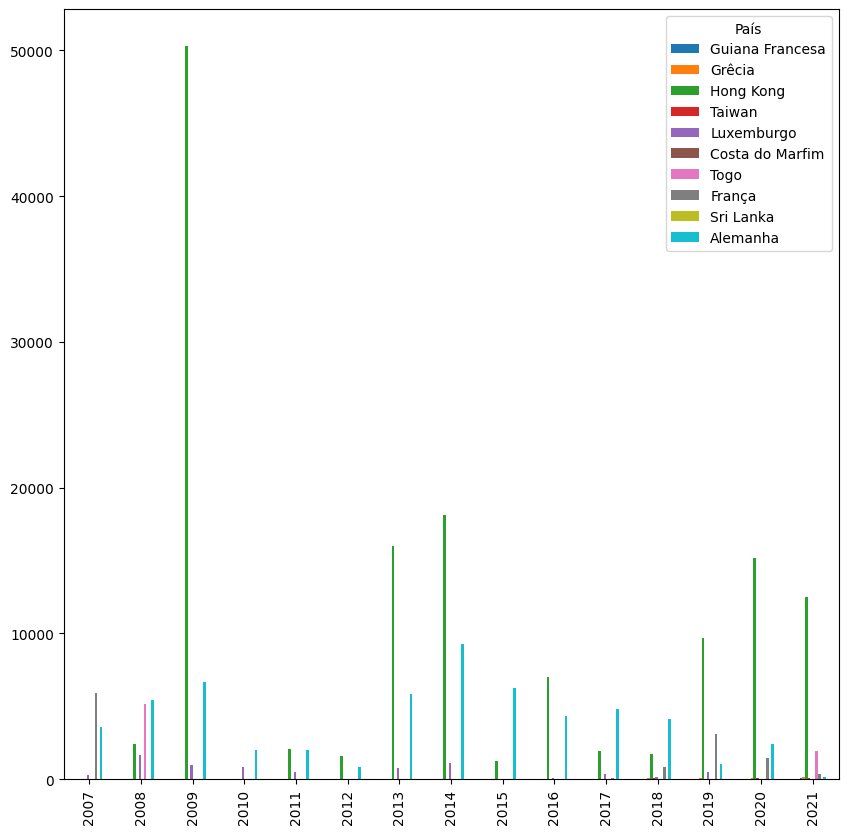

In [92]:
df_periodos_exportacao.sample(10).T.plot(kind='bar', figsize=(10,10))

## Exploração Importação

In [45]:
df_imp_geral.sort_values(by='2021', ascending=False).head(15)

,País,2007,2007 KG,2008,2008 KG,2009,2009 KG,2010,2010 KG,2011,...,2017 KG,2018,2018 KG,2019,2019 KG,2020,2020 KG,2021,2021 KG,Produto
138,Chile,18845522,47680946,18662626,50748373,22476643,61380795,26434744,72983389,26642889,...,145628860,51104825,144731210,52697108,145471294,72726186,176540499,69617587,182568098,Vinho
128,Argentina,15621172,36160548,14417761,37382581,13902750,38521731,16965266,52126581,16673491,...,51770842,15221318,52817642,16548931,54527380,22610267,66322932,26869241,79527959,Vinho
172,Portugal,6805601,23945522,6213781,23826443,5884719,23688318,7801759,29299792,8556375,...,45032247,17698831,53237413,18228699,51444189,23627260,66353572,25925363,75668823,Vinho
65,Argentina,15203133,19187668,15641645,26994373,17209323,24106889,17279688,34499504,20533473,...,34422405,23564519,43501396,24135143,48810789,24992502,36743996,24015825,33337604,Passas
156,Itália,9177932,22023175,9723292,24378627,8387908,23079424,11911190,28683242,12025827,...,33707111,10154564,34857594,10323254,33355982,9659999,32477890,11231625,39852162,Vinho
145,Espanha,862045,4506858,990697,6036397,1119540,6224187,1622100,8698824,1999970,...,19834451,5595268,19353631,5797980,17111436,7169384,19802061,8793911,23795616,Vinho
147,França,2737947,14721769,2466277,16275708,2372448,16893114,2799118,18778566,3329437,...,25280255,4653789,22688105,5324383,24299524,5658139,24894394,6241310,31428188,Vinho
45,Chile,7122019,7288258,3479598,4246892,10846054,12828213,11806542,17019296,18620819,...,29248621,16103415,25237521,9082957,13450429,4943446,6986630,3888723,5404163,Frescas
185,Uruguai,2387225,3131899,920389,2089539,750343,1953390,1219387,3175051,1264306,...,7751966,2836574,8467846,2778244,7938059,4079076,10146829,3788831,10063341,Vinho
16,Espanha,254317,1003934,266955,1179471,388452,1397582,512539,1904476,831585,...,5592839,1515106,5707839,1440241,4463736,1421655,3871128,2016806,5732174,Espumante


In [38]:
df_imp_geral.head(3)

,País,2007,2007 KG,2008,2008 KG,2009,2009 KG,2010,2010 KG,2011,...,2017 KG,2018,2018 KG,2019,2019 KG,2020,2020 KG,2021,2021 KG,Produto
0,Africa do Sul,90,1073,9212,30630,10381,42463,8121,37035,20213,...,23919,15368,74800,17583,72077,3574,14542,6980,36677,Espumante
1,Alemanha,1980,11786,1959,12516,1170,8434,1116,5753,810,...,37116,18376,82273,26853,169989,21174,65359,19977,46237,Espumante
2,Argentina,556320,1441196,1015357,3094003,894550,2730102,1086901,3583463,997492,...,2249681,706478,2462909,757716,2282614,469547,1304986,723847,2211657,Espumante


## Exploração Processamento

In [39]:
df_processa_filtrada.head(3)

,control,cultivar,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
1,ti_Bacarina,Bacarina,12070,16780,10810,7850,12930,3820,2990,3900,0,0,0,0,nd,0,0
2,ti_Bailey,Bailey,236139,235828,559815,604895,769140,912286,756000,991449,963159,442784,1370092,539742,nd,534981,4092669
3,ti_Bordo,Bordo,76907674,97644667,69521354,89066377,139754250,127378006,102788361,113008320,137467196,60976531,160146475,158405972,nd,129978861,117655879


## Exploração Comércio

In [40]:
df_comercio_filtrada.head(3)

,control,cultivar,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
1,vm_Rosado,Rosado,2252558,1840779,2307580,2036928,1668823,1738134,1777648,1419855,1409002,1391942,1097426,1972944,1265435,1394901,1931606
2,vm_Branco,Branco,29122090,26627054,39214217,30556943,32078923,31266661,31779668,26734500,25760681,18731315,20653091,20097830,20661836,24589607,22426954
3,VINHO FINO DE MESA,VINHO FINO DE MESA,21485699,23167738,33080270,21390159,19967310,22469950,27912934,20424983,20141631,19630158,15874354,14826143,15684588,24310834,27080445


## Exploração Produção

In [41]:
df_producao_filtrada.head(3)

,control,cultivar,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
1,vm_Branco,Branco,42118552,42942053,39211278,35408083,46007504,34938249,32066403,37438069,39557250,10727099,217527985,29229970,22032828,19568734,26432799
2,vm_Rosado,Rosado,5013136,3506830,2063474,2569809,1719887,1963356,1726022,958691,939838,312725,36121245,875524,1551794,715289,1391200
3,VINHO FINO DE MESA (VINÍFERA),VINHO FINO DE MESA (VINÍFERA),43176484,47334501,39900568,24805713,47598471,45200730,45782530,38464314,37148982,18070626,44537870,38707220,37615422,32516686,43474998


## Levantamento de Hipóteses 

In [ ]:
## Insights Requeridos|Atividades

# Criação da Tabela do Head (País de Origem(Brasil), País de Destino, Quantidade em Litros de Vinho Exportado, Valor em US$)
# Informar o montante de vendas de exportação nos ultimos 15 anos, separados por País
# trazer a prospecção futura
# Trazer possíveis melhorias nas exportações
# Criar gráficos informando os detalhes de cada Insight que iremos gerar



# Tabelas de Exportação - O uso delas será para fazer as atividades principais do projeto, que serão: Criação da tabela, separação dos relatórios por pais, prospecção, possiveis melhorias e gráficos.
# Tabelas de Importação - Comparar com a tabela de exportação

dados interessantes: https://winefun.com.br/consumo-de-vinho-brasil-consolida-posicao-em-2021-ano-marcado-por-reviravoltas/

# Criação da Tabela de Exportação

In [143]:
## País de Origem(Brasil), País de Destino, Qtd em Litros de Vinho(1kg = 1l) e Valor em US$.

df_exp_vinho_tabela_final = df_exp_vinho.copy()

In [144]:
df_exp_vinho_tabela_final.set_index("País", inplace=True)

In [145]:
df_exp_vinho_tabela_final[df_exp_vinho_tabela_final.columns[1::2]].sum()

2007.1     3686150
2008.1     7118100
2009.1     8940988
2010.1     2595303
2011.1     3615120
2012.1     5521293
2013.1    22744845
2014.1     7472795
2015.1     2769160
2016.1     4434704
2017.1     7135607
2018.1     7486063
2019.1     5934826
2020.1     6078288
2021.1     9851942
dtype: int64

In [146]:
for idx, row in df_exp_vinho_tabela_final.iterrows():
    df_exp_vinho_tabela_final.loc[df_exp_vinho_tabela_final.index == idx, "Total em Litros"] = row[1::2].sum()

In [151]:
for idx, row in df_exp_vinho_tabela_final.iterrows():
    df_exp_vinho_tabela_final.loc[df_exp_vinho_tabela_final.index == idx, "Total em US$"] = row[0::2].sum()

In [152]:
df_exp_vinho_tabela_final

,2007,2007.1,2008,2008.1,2009,2009.1,2010,2010.1,2011,2011.1,...,2018,2018.1,2019,2019.1,2020,2020.1,2021,2021.1,Total em Litros,Total em US$
País,,,,,,,,,,,,,,,,,,,,,
Afeganistão,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,11,46,46.0,57.0
África do Sul,0,0,0,0,0,0,0,0,0,0,...,0,0,26,95,4,21,0,0,116.0,146.0
"Alemanha, República Democrática",119512,238052,265742,429970,225086,393482,27715,138666,36070,144150,...,10794,45382,3660,25467,6261,32605,2698,6741,2739079.0,3760012.0
Angola,25931,49753,25721,71083,54786,84235,33557,189891,13889,69001,...,477,709,345,1065,0,0,0,0,621181.0,811912.0
Anguilla,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Tuvalu,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,4,0,0,4.0,6.0
Uruguai,0,0,0,0,0,0,914,2929,1238,4404,...,7711,29617,6180,18497,0,0,136774,149842,222511.0,377989.0
Vanuatu,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,18,31,0,0,31.0,49.0


In [188]:
df_exp_vinho_tabela_final.loc[df_exp_vinho_tabela_final.index == 'Alemanha, República Democrática'][df_exp_vinho_tabela_final.columns[1::2]]

,Total em US$
País,
"Alemanha, República Democrática",3760012.0


In [149]:
df_exp_vinho_tabela_final.drop(columns='Produto',inplace=True)

In [153]:
df_exp_vinho_tabela_final

,2007,2007.1,2008,2008.1,2009,2009.1,2010,2010.1,2011,2011.1,...,2018,2018.1,2019,2019.1,2020,2020.1,2021,2021.1,Total em Litros,Total em US$
País,,,,,,,,,,,,,,,,,,,,,
Afeganistão,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,11,46,46.0,57.0
África do Sul,0,0,0,0,0,0,0,0,0,0,...,0,0,26,95,4,21,0,0,116.0,146.0
"Alemanha, República Democrática",119512,238052,265742,429970,225086,393482,27715,138666,36070,144150,...,10794,45382,3660,25467,6261,32605,2698,6741,2739079.0,3760012.0
Angola,25931,49753,25721,71083,54786,84235,33557,189891,13889,69001,...,477,709,345,1065,0,0,0,0,621181.0,811912.0
Anguilla,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Tuvalu,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,4,0,0,4.0,6.0
Uruguai,0,0,0,0,0,0,914,2929,1238,4404,...,7711,29617,6180,18497,0,0,136774,149842,222511.0,377989.0
Vanuatu,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,18,31,0,0,31.0,49.0


In [160]:
df_exp_vinho_tabela_final = df_exp_vinho_tabela_final[df_exp_vinho_tabela_final.columns[-2:]]

In [161]:
df_exp_vinho_tabela_final.head(2)

,Total em Litros,Total em US$
País,,
Afeganistão,46.0,57.0
África do Sul,116.0,146.0


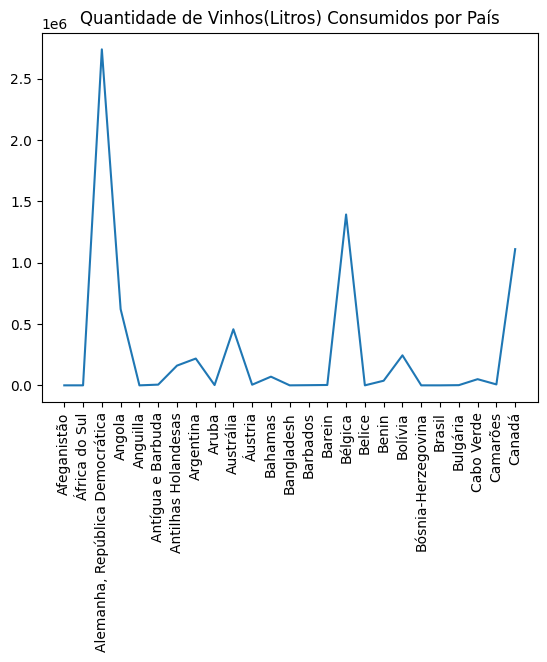

In [180]:
df_vinho_sample = df_exp_vinho_tabela_final.head(25)
plt.plot(df_vinho_sample.index, df_vinho_sample['Total em Litros'])
plt.xticks(rotation=90)
plt.title("Quantidade de Vinhos(Litros) Consumidos por País")
plt.show();

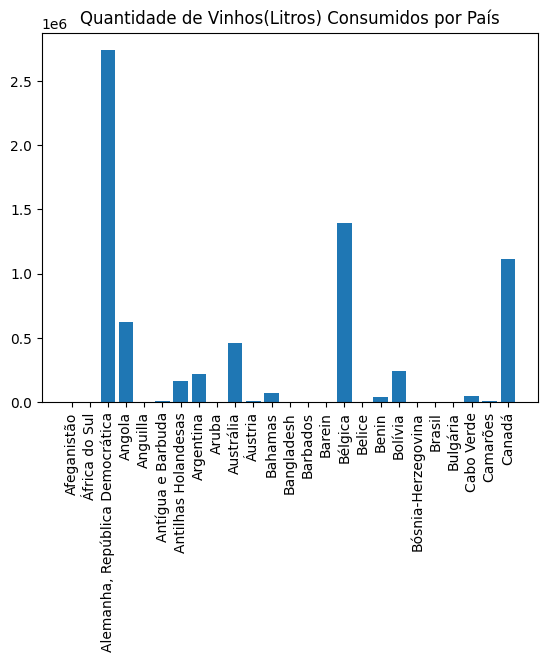

In [190]:
df_vinho_sample = df_exp_vinho_tabela_final.head(25)
plt.bar(df_vinho_sample.index, height=df_vinho_sample['Total em Litros'])
plt.xticks(rotation=90)
plt.title("Quantidade de Vinhos(Litros) Consumidos por País")
plt.show();

In [179]:
# Mostrar na prática o quanto os gráficos podem ser confusos, exemplo de gráfico com croacia e grécia juntos ao lado de Alemanha